# Medidas de desempenho em classificação

## Matriz de Confusão

A matriz de confusão é uma ferramenta fundamental na avaliação de algoritmos de classificação. Ela organiza e resume as previsões feitas por um classificador em comparação com os rótulos reais, permitindo uma análise detalhada dos acertos e erros.

### Estrutura da Matriz de Confusão

Uma matriz de confusão é representada como uma tabela quadrada que organiza as previsões em quatro categorias principais:

- **Verdadeiro Positivo (VP)**: O classificador previu corretamente uma amostra como pertencente à classe positiva.
- **Verdadeiro Negativo (VN)**: O classificador previu corretamente uma amostra como pertencente à classe negativa.
- **Falso Positivo (FP)**: O classificador previu incorretamente uma amostra como pertencente à classe positiva, quando ela pertence à classe negativa (também conhecido como erro Tipo I).
- **Falso Negativo (FN)**: O classificador previu incorretamente uma amostra como pertencente à classe negativa, quando ela pertence à classe positiva (também conhecido como erro Tipo II).

Em um problema de duas classes, a matriz de confusão pode ser representada da seguinte maneira:

|               | **Classe Predita: Positivo** | **Classe Predita: Negativo** |
|---------------|------------------------------|------------------------------|
| **Classe Real: Positivo** | Verdadeiro Positivo (VP)    | Falso Negativo (FN)         |
| **Classe Real: Negativo** | Falso Positivo (FP)         | Verdadeiro Negativo (VN)    |

### Exemplo com o Dataset Iris

In [16]:
## Importando bibliotecas
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [17]:
# Carregando o dataset Iris
iris = load_iris()

# Criando um DataFrame para explorar os dados
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris['target_name'] = df_iris['target'].apply(lambda x: iris.target_names[x])

Vamos simplificar o problema para apenas duas classes

In [18]:
df_iris['binary_target'] = df_iris['target'].apply(lambda x: 1 if x == 1 else 0)
df_iris["binary_target"].unique()

array([0, 1])

In [19]:
df_iris['binary_target'].value_counts()

binary_target
0    100
1     50
Name: count, dtype: int64

In [20]:
# Separando as variáveis independentes e dependentes
X = iris.data
y = df_iris['binary_target']

In [21]:
# Separando dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [22]:
# Treinando um classificador de Regressão Logística
model_bin = LogisticRegression()
model_bin.fit(X_train, y_train)

LogisticRegression()

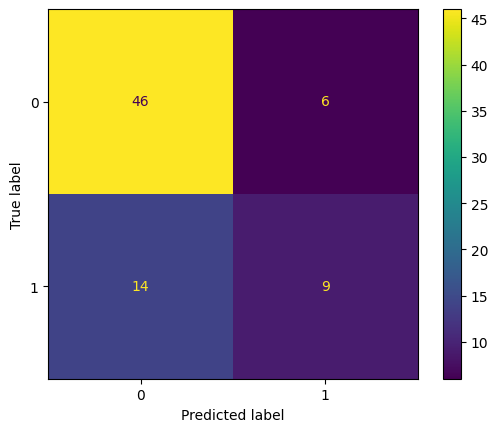

In [23]:
# Fazendo previsões no conjunto de teste
y_pred = model_bin.predict(X_test)

_ = ConfusionMatrixDisplay.from_estimator(model_bin, X_test, y_test)

## Acurácia

A **Acurácia** é a métrica mais simples e intuitiva, representando a proporção de previsões corretas feitas pelo classificador em relação ao total de previsões. Ela é dada pela fórmula:

$$
\text{Acurácia} = \frac{\text{Número de Previsões Corretas}}{\text{Número Total de Previsões}} = \frac{VP + VN}{VP + VN + FP + FN}
$$

Onde:
- **VP**: Verdadeiros Positivos (corretamente classificados como positivos)
- **VN**: Verdadeiros Negativos (corretamente classificados como negativos)
- **FP**: Falsos Positivos (incorretamente classificados como positivos)
- **FN**: Falsos Negativos (incorretamente classificados como negativos)

### Limitações da Acurácia

A acurácia pode ser enganosa quando lidamos com **classes desbalanceadas**. Se, por exemplo, 95% dos dados pertencem a uma única classe, um modelo que sempre prevê essa classe terá uma acurácia alta, mesmo que não seja eficaz na detecção da classe minoritária.

No caso de classificação binária com o **dataset Iris**, temos uma distribuição desbalanceada, com 100 amostras da classe 0 e 50 amostras da classe 1.

Se o modelo "chutasse" todas as previsões como  classe 0, ele ainda teria uma **acurácia** de quase 70%.

In [24]:
# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia: {accuracy:.2f}")


Acurácia: 0.73


## Precisão (Precision)

A **Precisão** (ou Precision) é uma métrica que mede a proporção de previsões positivas corretas feitas por um modelo de classificação. Ela é particularmente útil quando o custo de **falsos positivos** é alto, ou seja, quando é importante garantir que as previsões positivas sejam realmente precisas.

A fórmula da precisão é dada por:

$$
\text{Precisão} = \frac{\text{Verdadeiros Positivos (VP)}}{\text{Verdadeiros Positivos (VP)} + \text{Falsos Positivos (FP)}}
$$

A precisão responde à pergunta:

**"Entre todas as previsões positivas feitas pelo modelo, quantas estavam corretas?"**

### Exemplo com o Dataset Iris

In [25]:
# Calculando a precisão para a classe 1 (Não-Setosa)
precision = precision_score(y_test, y_pred)
print(f"Precisão (Classe 1): {precision:.2f}")

Precisão (Classe 1): 0.60


## Recall (Revocação)

A **Revocação** (ou Recall) é uma métrica que mede a capacidade do modelo de identificar corretamente todas as amostras positivas. Ela é particularmente útil quando o custo de **falsos negativos** é alto, ou seja, quando é importante garantir que o modelo consiga capturar todos os exemplos da classe positiva.

A fórmula da revocação é:

$$
\text{Revocação} = \frac{\text{Verdadeiros Positivos (VP)}}{\text{Verdadeiros Positivos (VP)} + \text{Falsos Negativos (FN)}}
$$

A revocação responde à pergunta:

**"Entre todas as amostras que realmente pertencem à classe positiva, quantas foram corretamente classificadas?"**


In [26]:
# Calculando a revocação para a classe 1 (Não-Setosa)
recall = recall_score(y_test, y_pred)
print(f"Revocação (Classe 1): {recall:.2f}")

Revocação (Classe 1): 0.39


## F1-Score

O **F1-Score** é uma métrica que combina as informações de **Precisão** e **Revocação** em uma única medida. Ele é particularmente útil em situações em que há um desbalanceamento entre as classes, e buscamos um equilíbrio entre a capacidade do modelo de identificar corretamente os positivos (Revocação) e de minimizar os falsos positivos (Precisão).

O **F1-Score** é calculado como a **média harmônica** entre a Precisão e a Revocação, e sua fórmula é:

$$
F1 = 2 \times \frac{\text{Precisão} \times \text{Revocação}}{\text{Precisão} + \text{Revocação}}
$$

### Interpretação

O **F1-Score** varia de 0 a 1, onde:
- **1** indica que o modelo tem alta Precisão e alta Revocação (um equilíbrio perfeito).
- **0** significa que o modelo falhou completamente.

O **F1-Score** é útil em casos onde temos classes desbalanceadas e precisamos garantir que o modelo tenha bom desempenho tanto em termos de detectar os positivos quanto em não cometer muitos erros ao classificá-los. 


In [27]:
# Calculando o F1-Score para a classe 1 (Não-Setosa)
f1 = f1_score(y_test, y_pred)
print(f"F1-Score (Classe 1): {f1:.2f}")

F1-Score (Classe 1): 0.47
